# Imports 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
sns.set() 

In [2]:
fifa = pd.read_csv('data.csv')

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,94,94,84.0,95.0,70.0,90.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,94,94,84.0,94.0,89.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,92,93,79.0,87.0,62.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,91,93,17.0,13.0,21.0,50.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,91,92,93.0,82.0,55.0,92.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


# Data cleaning

In [4]:
fifa.isnull().sum()

Unnamed: 0          0
ID                  0
Name                0
Age                 0
Overall             0
Potential           0
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [5]:
fifa.dropna(axis=0,inplace=True)

In [6]:
fifa.isnull().sum()

Unnamed: 0         0
ID                 0
Name               0
Age                0
Overall            0
Potential          0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [7]:
fifa.drop(['ID','Unnamed: 0'],axis=1,inplace=True)

# EDA 

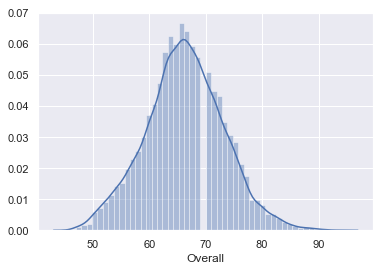

In [8]:
sns.distplot(fifa['Overall'])

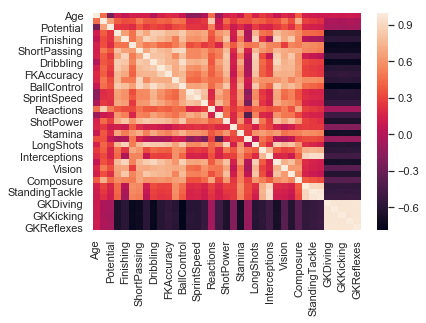

In [9]:
sns.heatmap(fifa.corr())

# Data prep for Regression


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=fifa.drop(['Overall','Name'],axis=1)

In [12]:
y=fifa['Overall'].values

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Running the regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression(normalize=True)

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Checking the results

In [17]:
#Checking the constant
lm.intercept_

-14.987862131796746

In [18]:
#Checking R squared
lm.score(X_train,y_train)

0.9244690681194199

In [19]:
fifaco=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [20]:
#Which values influence rating the most ?
fifaco.sort_values(by=['coeff'], ascending=False)

,coeff
Potential,0.524142
Age,0.506910
Reactions,0.154586
BallControl,0.073115
GKReflexes,0.053744
Composure,0.048224
HeadingAccuracy,0.048002
ShortPassing,0.046839
GKDiving,0.044848
GKHandling,0.036744


# Displaying results with Matplotib & Seaborn

In [21]:
pred = lm.predict(X_test)

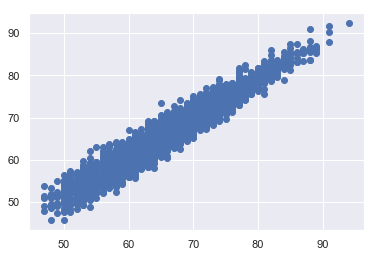

In [22]:
plt.scatter(y_test,pred)